### LearningRateScheduler callback 객체에 입력될 scheduler 함수 선언. 
* epoch 증가 시 마다 LR이 exponentially decay 되도록 설정. 

In [1]:
import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)

In [2]:
np.exp(-2.0)

0.1353352832366127

### LearningRateScheduler 로 Learning Rate를 epochs 시마다 변경하기
* LearningRateScheduler 객체 생성 시 인자로 scheduler 함수 입력하여 생성
* model.fit() callbacks인자로 LearningRateScheduler 객체 입력

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import LearningRateScheduler


def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)
    
# 테스트용 임시 모델을 생성. 
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록 
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01

Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/15
1/1 [==============================] - 1s 832ms/step - loss: 1674.2283 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.0036787943294869607.
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 27865872.0000 - lr: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533527735202996.
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 62076301312.0000 - lr: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706704056293.
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 17377162952704.0000 - lr: 4.9787e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00018315638425888493.
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 530052382982144.0000 - lr: 1.8316e-04

Epoch 6: LearningRateScheduler setting learning rate to 6.7379468892

### scheduler_exp 함수 결과를 시각화

In [4]:
def scheduler_exp(epoch):
    initial_lr = 0.01
    if epoch < 1:
        return initial_lr
    else:
        return initial_lr * np.exp(-1.0)**epoch

    
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록 
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01

Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/15
1/1 [==============================] - 0s 320ms/step - loss: 4950.2373 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.0036787944117144234.
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 83516952.0000 - lr: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533528323661271.
Epoch 3/15
1/1 [==============================] - 0s 20ms/step - loss: 186049331200.0000 - lr: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706836786395.
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 52081205444608.0000 - lr: 4.9787e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00018315638888734184.
Epoch 5/15
1/1 [==============================] - 0s 28ms/step - loss: 1588623577186304.0000 - lr: 1.8316e-04

Epoch 6: LearningRateScheduler setting learning rate to 6.737946999085469e-05.
E

In [5]:
epochs_list = range(30)
lr_list = [ scheduler_exp(epoch) for epoch in epochs_list]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

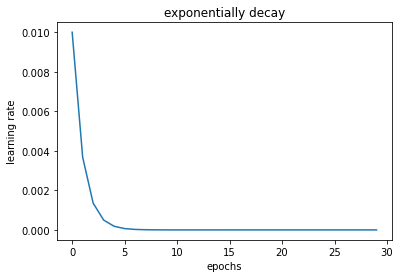

In [7]:
plot_scheduler(epochs_list, lr_list, 'exponentially decay')

### 또 다른 함수(step_decay)로 LearningRateScheduler 객체 생성하여 LR 조절. 

epoch: 0 lr: 0.1
epoch: 1 lr: 0.1
epoch: 2 lr: 0.1
epoch: 3 lr: 0.1
epoch: 4 lr: 0.1
epoch: 5 lr: 0.05
epoch: 6 lr: 0.05
epoch: 7 lr: 0.05
epoch: 8 lr: 0.05
epoch: 9 lr: 0.05
epoch: 10 lr: 0.025
epoch: 11 lr: 0.025
epoch: 12 lr: 0.025
epoch: 13 lr: 0.025
epoch: 14 lr: 0.025
epoch: 15 lr: 0.0125
epoch: 16 lr: 0.0125
epoch: 17 lr: 0.0125
epoch: 18 lr: 0.0125
epoch: 19 lr: 0.0125
epoch: 20 lr: 0.00625
epoch: 21 lr: 0.00625
epoch: 22 lr: 0.00625
epoch: 23 lr: 0.00625
epoch: 24 lr: 0.00625
epoch: 25 lr: 0.003125
epoch: 26 lr: 0.003125
epoch: 27 lr: 0.003125
epoch: 28 lr: 0.003125
epoch: 29 lr: 0.003125


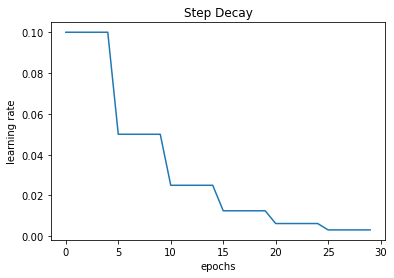

In [8]:
import tensorflow as tf

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * (drop ** np.floor((epoch)/epochs_drop))
    print('epoch:',epoch,'lr:', lr)
    return lr

lr_list = [step_decay(epoch) for epoch  in epochs_list]
plot_scheduler(epochs_list, lr_list, title='Step Decay')

In [9]:
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01
epoch: 0 lr: 0.1

Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/15
1/1 [==============================] - 0s 212ms/step - loss: 3680.0669 - lr: 0.1000
epoch: 1 lr: 0.1

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 6296837632.0000 - lr: 0.1000
epoch: 2 lr: 0.1

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 10792259603660800.0000 - lr: 0.1000
epoch: 3 lr: 0.1

Epoch 4: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 18497042526147839000576.0000 - lr: 0.1000
epoch: 4 lr: 0.1

Epoch 5: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 31702403179292231382618603520.0000 - lr: 0.1000
epoch: 5 lr: 0.05

Epoch 6: LearningRateScheduler s